## Згенерувати нормальний закон розподілу

In [1]:
import numpy as np
from numpy.random import uniform, seed
from numpy.typing import NDArray
from typing import Tuple, Union

def random_nums(size: int, interval: Tuple[float, float] = (0.0, 1.0)) -> Union[float, NDArray]:
    """Generate random numbers from interval"""
    return uniform(*interval, size)
    
def set_seed(seed_value):
    seed(seed_value)

In [15]:
from numpy import exp, sqrt

# Alpha and sigma parameters for generating
a = 10
s = 10
# Number of generating
N = 10000

def mu(size: int):
    """Generator of additional function mu"""
    return np.array([random_nums(12).sum() - 6 for i in range(size)])
    
def normal(size: int, sigma: float, alpha: float):
    """Generator of normal distribution"""
    return sigma * mu(size) + alpha

def density_normal(x, sigma, alpha):
    """Density of normal function"""
    return exp(-((x - alpha) ** 2) / (2 * sigma ** 2)) / (sigma * sqrt(2 * np.pi))
    
# Our generation values
x_norm = normal(N, s, a)
print("Normal generated number:", x_norm[:5]) 
print("Min and max values:", min(x_norm), max(x_norm))

Normal generated number: [ 1.14244347  1.43099935  4.59761707 29.89178298 -9.74475573]
Min and max values: -24.37166293749229 44.68181086065805


In [16]:
# Number of intervals
bins_num = 20
# Minimum number of interval
min_number = 5

counts, edges = np.histogram(x_norm, bins=bins_num)
print("Number of values in each interval:")
print("- before merging", counts)

# Merging intervals
accumulated_count, bin_edges = 0, [edges[0]]
for new_count, edge in zip(counts, edges[1:]):
    accumulated_count += new_count
    if accumulated_count >= min_number:
        bin_edges.append(edge)
        accumulated_count = 0
if counts[-1] < min_number:
    bin_edges.pop(-1)
    bin_edges.append(edges[-1])


new_intervals, _ = np.histogram(x_norm, bins=bin_edges)
print("- after merging", new_intervals)

Number of values in each interval:
- before merging [   7   19   52  118  250  431  669  985 1206 1346 1298 1175  900  696
  414  257  108   53   13    3]
- after merging [   7   19   52  118  250  431  669  985 1206 1346 1298 1175  900  696
  414  257  108   53   16]


Mean of distribution:  10.023510317855692
Variance of distribution: 101.29478180613947


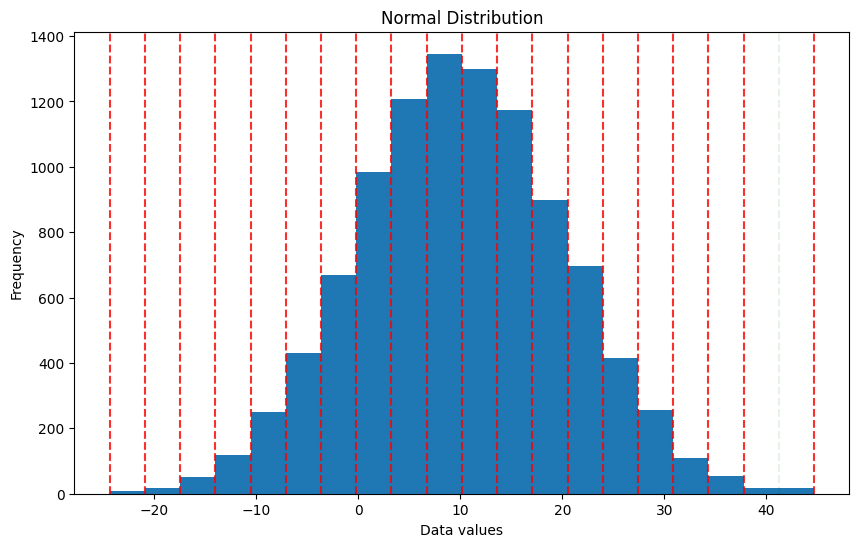

In [17]:
from matplotlib import pyplot as plt
from statistics import mean, variance, stdev

plt.figure(figsize=(10, 6))
plt.title("Normal Distribution")
plt.hist(x_norm, bins=bin_edges)


_, special_edges = np.histogram(x_norm, bins=bins_num)
for edge in special_edges:
    plt.axvline(edge, color='green', linestyle='--', alpha=0.1)
    
    
# Plot vertical lines at the bin edges
for edge in bin_edges:
    plt.axvline(edge, color='red', linestyle='--', alpha=0.8)
    
print("Mean of distribution: ", mean(x_norm))
print("Variance of distribution:", variance(x_norm))

plt.xlabel('Data values')
plt.ylabel('Frequency')
plt.show()

In [18]:
# Calculating chi squared
# Calculating middles and width of intervals
bin_mids = np.array([(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges) - 1)])
bin_width = np.array([bin_edges[i+1] - bin_edges[i] for i in range(len(bin_edges) - 1)])

In [19]:
# Determine the expected probability and theoretical values
expected_prob = density_normal(bin_mids, s, a) * bin_width
theoretical_values = 10000 * expected_prob
print("Theoretical values")
for value in theoretical_values:
    print(int(value), end=' ')

Theoretical values
6 19 50 114 233 421 676 961 1214 1360 1353 1194 936 651 402 220 107 46 21 

In [20]:
from scipy.stats import chi2_contingency

data = [new_intervals, theoretical_values]
stat, p, dof, expected = chi2_contingency(data)

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Two distributions are independent')
else:
    print('Two distributions are dependent')

p value is 0.9646330120185821
Two distributions are dependent
